In [81]:
#import wave generating function from utils file
from utils.waves import WaveGenerator

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#generate an example noisy wave with some low frequency

'''
amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/4
noise = 0.05

example_wave = gen_sine(frequency,sr,secs, noise,amplitude=amplitude)[:,0]
'''

amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/4
noise = 0.05



# Create an instance of the WaveGenerator class
wave_gen = WaveGenerator(sr=48000)

# Generate a sequence of sine waves with different frequencies and durations
example_wave = wave_gen.gen_sequence('sine', [222.5], [0.25], noise_sd = noise,amplitude=amplitude)#[:,0]


Text(0.5, 1.0, 'Time Domain')

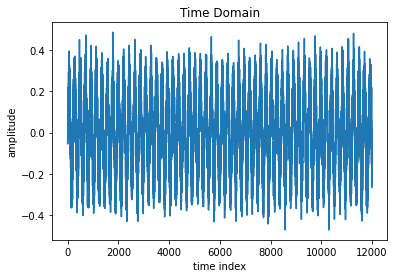

In [84]:
#plot example wave
plt.plot(example_wave)
plt.xlabel('time index')
plt.ylabel('amplitude')
plt.title('Time Domain')

Text(0.5, 1.0, 'Frequency Domain')

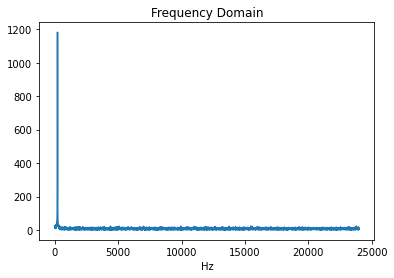

In [85]:
#perform a fast fourier transform to transform into the frequency domain
#found the following website to make things clear in python/matplab
##  https://pythontic.com/visualization/signals/fouriertransform_fft
##  https://www.mathworks.com/help/signal/ug/practical-introduction-to-frequency-domain-analysis.html
example_freq_dom = np.fft.fft(example_wave,n = len(example_wave))

example_freq_dom = example_freq_dom[range(int(len(example_wave)/2))] 


tpCount     = len(example_wave)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sr

frequencies = values/timePeriod

plt.plot(frequencies, abs(example_freq_dom))
plt.xlabel('Hz')
plt.title('Frequency Domain')

Text(0.5, 1.0, 'Frequency Domain')

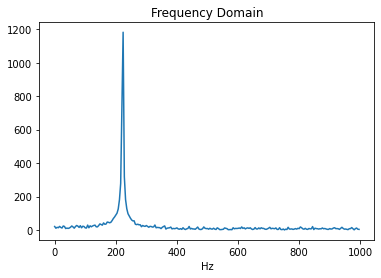

In [86]:
#Look at the frequency domain up to some reasonable frequency

indexes = frequencies<1000
plt.plot(frequencies[indexes], abs(example_freq_dom)[indexes])
plt.xlabel('Hz')
plt.title('Frequency Domain')

In [87]:
print(frequencies[:100]) #resolution of frequency domain will increase when we increase the time period of the chunks...

#i.e. jumps in frequency domain will be equal to 1/time period of chunk. So if we want to demonstrate a discrepency between 92 and 96, 
#we need time length of the chunk to be 1/4 unfortunately...

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380. 384. 388.
 392. 396.]


In [88]:
abs(example_freq_dom)[indexes]

array([2.05875799e+01, 1.03266464e+01, 1.56984130e+01, 1.32780707e+01,
       2.10936720e+01, 1.50946260e+01, 1.14315961e+01, 2.33733498e+01,
       2.09391918e+01, 8.44305999e+00, 1.10489794e+01, 9.12472183e+00,
       1.14213014e+01, 1.64485742e+01, 2.36130542e+01, 1.82160824e+01,
       1.05956004e+01, 2.02790259e+01, 2.65705059e+01, 2.27756646e+01,
       1.50608743e+01, 2.55162376e+01, 1.27376878e+01, 2.21665538e+01,
       2.05039426e+01, 1.23900570e+01, 1.14429802e+01, 2.88617049e+01,
       1.28982111e+01, 2.46130994e+01, 1.88587288e+01, 2.36803241e+01,
       2.68181539e+01, 2.88133428e+01, 1.87154925e+01, 1.83719064e+01,
       2.62975061e+01, 3.60579459e+01, 3.24595618e+01, 2.85941290e+01,
       4.18662682e+01, 3.39908987e+01, 3.50509502e+01, 4.70662548e+01,
       4.56113007e+01, 4.26522189e+01, 4.59448372e+01, 5.61115391e+01,
       6.82420978e+01, 7.74970015e+01, 8.82561954e+01, 1.00134533e+02,
       1.25468306e+02, 1.80419400e+02, 2.78288243e+02, 7.10891362e+02,
      

In [89]:
#checking if the peak matches the frequency at which our example wave was generated
frequencies[np.argmax(abs(example_freq_dom))]

224.0

In [90]:
def chunk_to_FreqDom(wave,sr):
    #apply fft
    freq_dom = np.fft.fft(wave,n = len(wave))

    freq_dom = freq_dom[range(int(len(wave)/2))] 

    tpCount  = len(wave)

    values  = np.arange(int(tpCount/2))

    timePeriod  = tpCount/sr
    
    #compute the frequencies at which each amplitude is calculated
    frequencies = values/timePeriod

    amplitudes = abs(freq_dom)
    
    return frequencies,amplitudes

In [91]:
print('freqs',chunk_to_FreqDom(example_wave,sr)[0])
print('amps',chunk_to_FreqDom(example_wave,sr)[1])

freqs_testing = chunk_to_FreqDom(example_wave,sr)[0]
amps_testing = chunk_to_FreqDom(example_wave,sr)[1] 

freqs [0.0000e+00 4.0000e+00 8.0000e+00 ... 2.3988e+04 2.3992e+04 2.3996e+04]
amps [20.5875799  10.32664643 15.69841297 ... 13.33327822  5.71229935
  4.93094602]


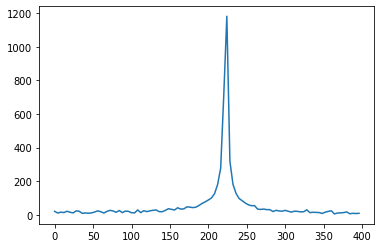

In [92]:
plt.plot(chunk_to_FreqDom(example_wave,sr)[0][:100],chunk_to_FreqDom(example_wave,sr)[1][:100])

In [93]:
# Function to calculate frequency for a given musical note
def calculate_frequency(note, octave):
    A4_frequency = 440.0  # Frequency of A4 in Hz

    # Mapping of musical notes to their relative frequencies
    note_mapping = {'C': -9, 'C#': -8, 'Db': -8, 'D': -7, 'D#': -6, 'Eb': -6,
                    'E': -5, 'Fb': -5, 'E#': -4, 'F': -4, 'F#': -3, 'Gb': -3,
                    'G': -2, 'G#': -1, 'Ab': -1, 'A': 0, 'A#': 1, 'Bb': 1,
                    'B': 2, 'Cb': 2, 'B#': 3}

    # Calculate the frequency using the formula: f = A4 * 2^(n/12), where n is the note difference
    frequency = A4_frequency * (2 ** ((note_mapping[note] + (octave - 4) * 12) / 12.0))

    return frequency

# Generate the dictionary for musical notes from C1 to C8
notes = ['C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'Fb', 'E#', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab', 'A', 'A#', 'Bb', 'B', 'Cb', 'B#']
musical_notes = {}

for octave in range(1, 9):
    for note in notes:
        note_name = f"{note}{octave}"
        frequency = calculate_frequency(note, octave)
        musical_notes[note_name] = frequency
        
musical_notes_inv = {val: key for key, val in musical_notes.items()}


#additionally create an array of the notes' frequencies
frequencies = []
for key, value in musical_notes_inv.items():
    frequencies.append(key)

#create an array for the notes' frequencies which are greater than 92Hz
main_notes_frequencies = frequencies[18:]

#create an array for the boundaries between the notes' regions
main_notes_bounds = []
for i in range(len(main_notes_frequencies)-1):
    main_notes_bounds.append((main_notes_frequencies[i]+main_notes_frequencies[i+1])/2)

print(main_notes_frequencies)
print(main_notes_bounds)
print(frequencies)
print(musical_notes_inv)

[92.4986056779086, 97.99885899543733, 103.82617439498628, 110.0, 116.54094037952248, 123.47082531403103, 130.8127826502993, 138.59131548843604, 146.8323839587038, 155.56349186104046, 164.81377845643496, 174.61411571650194, 184.9972113558172, 195.99771799087463, 207.65234878997256, 220.0, 233.08188075904496, 246.94165062806206, 261.6255653005986, 277.1826309768721, 293.6647679174076, 311.1269837220809, 329.6275569128699, 349.2282314330039, 369.9944227116344, 391.99543598174927, 415.3046975799451, 440.0, 466.1637615180899, 493.8833012561241, 523.2511306011972, 554.3652619537442, 587.3295358348151, 622.2539674441618, 659.2551138257398, 698.4564628660078, 739.9888454232688, 783.9908719634985, 830.6093951598903, 880.0, 932.3275230361799, 987.7666025122483, 1046.5022612023945, 1108.7305239074883, 1174.6590716696303, 1244.5079348883237, 1318.5102276514797, 1396.9129257320155, 1479.9776908465376, 1567.981743926997, 1661.2187903197805, 1760.0, 1864.6550460723597, 1975.533205024496, 2093.0045224

In [94]:
musical_notes_inv[32.70319566257483]

'C1'

[  26.57050594   20.50394259   11.44298017   28.86170492   24.6130994
   23.68032408   28.81334281   18.71549249   36.05794593   41.86626823
   35.05095023   47.06625481   56.11153905   88.25619543  180.41940034
 1182.61408765  318.64959546   83.61334351   54.67859432   34.17160124
   26.52990522   21.44897799   29.57609298   20.30611086   24.04243578
   12.31770664   13.07530494   20.84402154   17.26592865   17.94221263
   12.5338577    11.94766845   13.1232943    17.94140218   14.06592191
   15.63681184   13.38487374   17.79806202   20.02289418   11.76944865
   15.84893182   14.16689874   14.16026156   12.64142742   16.69380616
   16.85111278   10.52319862   14.9867406    14.22630886   15.11563883
   17.93158991   18.33113083   19.68243713   17.573822     14.89663812
   19.4550241    13.09114804   15.27832364   14.88130496   17.28761639
   14.94474117   15.82890465   14.48157294   17.3829317    17.19775866
   19.02921873   12.6660935    22.05380936   18.32809308   22.45274705
   16.1

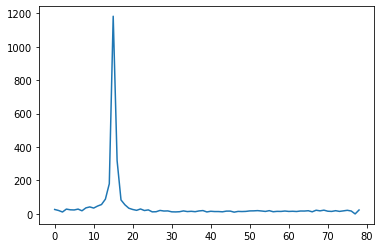

In [95]:
#return an array of the max amplitude within binned frequency regions, bins are defined using the boundaries between them
#requires frequencies, amplitudes, and boundaries to be defined as np arrays...
def binned_max_amp(frequencies,amplitudes,boundaries):
    binned_max_amps = np.zeros(len(boundaries)+1)
    binned_max_amps[0] = max(amplitudes[frequencies<boundaries[0]])
    binned_max_amps[-1] = max(amplitudes[frequencies>=boundaries[-1]])
    for i in range(1,len(boundaries)-1):
        left_boundary = frequencies>=boundaries[i-1]
        right_boundary = frequencies<boundaries[i]
        binned_max_amps[i] = max(amplitudes[left_boundary*right_boundary])
    return binned_max_amps


binned_max_amp(np.array(freqs_testing),np.array(amps_testing),np.array(main_notes_bounds))
y = binned_max_amp(np.array(freqs_testing),np.array(amps_testing),np.array(main_notes_bounds))
print(y)
print(amps_testing)
plt.plot(y)
print(main_notes_bounds)


In [96]:
left_boundary = np.array(frequencies)<1000
right_boundary = np.array(frequencies)>200
np.array(frequencies)[left_boundary*right_boundary]

array([207.65234879, 220.        , 233.08188076, 246.94165063,
       261.6255653 , 277.18263098, 293.66476792, 311.12698372,
       329.62755691, 349.22823143, 369.99442271, 391.99543598,
       415.30469758, 440.        , 466.16376152, 493.88330126,
       523.2511306 , 554.36526195, 587.32953583, 622.25396744,
       659.25511383, 698.45646287, 739.98884542, 783.99087196,
       830.60939516, 880.        , 932.32752304, 987.76660251])

In [98]:
def chunk_to_binarray(wave,sr,boundaries):
    frequencies,amplitude = chunk_to_FreqDom(wave,sr)
    binned_max_amps = binned_max_amp(frequencies,amplitude,boundaries)
    return binned_max_amps

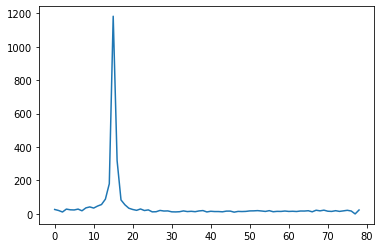

In [99]:
plt.plot(chunk_to_binarray(example_wave,sr,main_notes_bounds))

### Applying to Twinkle

In [150]:
from utils.read_write import read, write

sr, X = read("twinkle.mp3")
X = X[:, 0]
sr

48000

In [151]:
chunk_size = int(1/4 * sr)
n_chunks = len(X) // chunk_size
 
result = []
for chunk in np.split(X[:chunk_size*n_chunks], n_chunks):
    result.append(chunk_to_binarray(chunk, sr, main_notes_bounds))

62.5


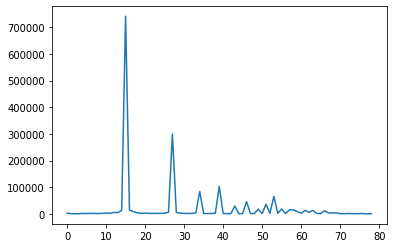

220.0

In [152]:
i = 250
print(i * chunk_size / sr)
plt.plot(result[i])
plt.show()

freq = main_notes_frequencies[np.argmax(result[i])]
freq

In [153]:
thresh = np.max(np.max(result))/15
for i, res in enumerate(result):
    res[res < thresh] = 0
    result[i] = res

62.5


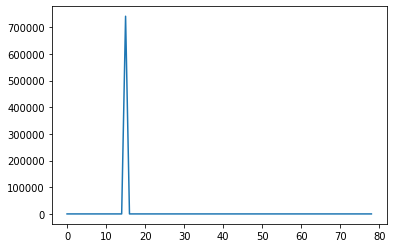

220.0

In [154]:
i = 250
print(i * chunk_size / sr)
plt.plot(result[i])
plt.show()

freq = main_notes_frequencies[np.argmax(result[i])]
freq

In [155]:
def get_freq_from_res(res):
    return main_notes_frequencies[np.argmax(res)]

freqs = np.array([get_freq_from_res(res) for res in result])

freqs[freqs < 93] = 0

freqs = np.trim_zeros(freqs)

In [156]:
freqs

array([195.99771799, 195.99771799, 195.99771799, 195.99771799,
         0.        , 195.99771799, 195.99771799, 195.99771799,
       195.99771799, 195.99771799, 293.66476792, 293.66476792,
       293.66476792, 293.66476792,   0.        , 293.66476792,
       293.66476792, 293.66476792, 293.66476792, 293.66476792,
       329.62755691, 329.62755691, 329.62755691, 329.62755691,
       329.62755691,   0.        , 329.62755691, 329.62755691,
       329.62755691, 329.62755691, 329.62755691, 293.66476792,
       293.66476792, 293.66476792, 293.66476792, 293.66476792,
       293.66476792, 293.66476792, 293.66476792,   0.        ,
         0.        , 261.6255653 , 261.6255653 , 261.6255653 ,
       261.6255653 ,   0.        , 261.6255653 , 261.6255653 ,
       261.6255653 , 261.6255653 , 261.6255653 , 246.94165063,
       246.94165063, 246.94165063, 246.94165063,   0.        ,
       246.94165063, 246.94165063, 246.94165063, 246.94165063,
       246.94165063, 246.94165063, 220.        , 220.  

In [158]:
write("new_sick_beat.mp3", 48000, wave_gen.gen_sequence('sine', freqs, [chunk_size/sr] * len(freqs)), normalized=True)

In [166]:
from midiutil import MIDIFile

def frequencies_to_midi(frequencies, output_file='output.mid', tempo=120):
    midi = MIDIFile(1)
    midi.addTempo(0, 0, tempo)

    for i, freq in enumerate(frequencies):
        if freq > 0:
            midi.addNote(0, 0, 50, 0.2, 1.0, 100)

    with open(output_file, 'wb') as midi_file:
        midi.writeFile(midi_file)

# Example usage:
frequencies = np.array([440.0]) # Example frequencies for MIDI notes
output_filename = 'output.mid'

frequencies_to_midi(frequencies, output_filename)
